In [3]:
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
import numpy as np
from operator import add
from scipy.stats import pearsonr

In [31]:
class CGR():
    K = 0
    c = None
    h = ""
    Data = ""
    i = 0
    def __init__(self,a):
        self.i=a
    def read_fasta(self,loc):
        f = open(loc)
        s1 = f.read()
        data = "".join(s1.split("\n")[1:])
        head = "".join(s1.split("\n")[0:1])
        return data,head
    
    def count_kmers(self,sequence, k):
        d = collections.defaultdict(int)
        for i in range(len(self.Data)-(k-1)):
            d[sequence[i:i+k]] +=1
        d.pop("N",None)
        return d

    def probabilities(self,kmer_count, k):
        probabilities = collections.defaultdict(float)
        N = len(self.Data)
        for key, value in kmer_count.items():
            probabilities[key] = float(value) / (N - k + 1)
        return probabilities

    def chaos_game_representation(self,probabilities, k):
        array_size = int(math.sqrt(4**k))
        chaos = []
        for i in range(array_size):
            chaos.append([0]*array_size)
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
        for key, value in probabilities.items():
            for char in key:
                if char == "T":
                    posx +=  maxx/2
                elif char == "C":
                    posy += maxy/2
                elif char == "G":
                    posx += maxx/2
                    posy += maxy/2
                maxx /= 2
                maxy /= 2

            chaos[int(posy-1)][int(posx-1)] = value
            maxx = array_size
            maxy = array_size
            posx = 1
            posy = 1
        chaos = chaos/np.amax(chaos)
        return chaos

    def load_fasta(self,loc,k):
        data,head = self.read_fasta(loc)
        self.Data = data
        f4 = self.count_kmers(data, k)
        f4_prob = self.probabilities(f4, k)
        chaos_k4 = self.chaos_game_representation(f4_prob, k)
        self.c = chaos_k4
        self.h = head
        return chaos_k4
    
    def show(self):
        pylab.figure(figsize=(12,12))
        pylab.title('CGR of '+str(self.K)+'-mers for '+self.h[2:])
        pylab.imshow(self.c, cmap=cm.gray_r,vmin=-0.1, vmax=2)#,interpolation = "spline36")
        pylab.savefig(str(self.i)+".PNG")
        pylab.show()

In [34]:
B = CGR(1)
cg = B.load_fasta("seq_1.fasta",6)
C = CGR(2)
cg_1 = C.load_fasta("seq_2.fasta",6)

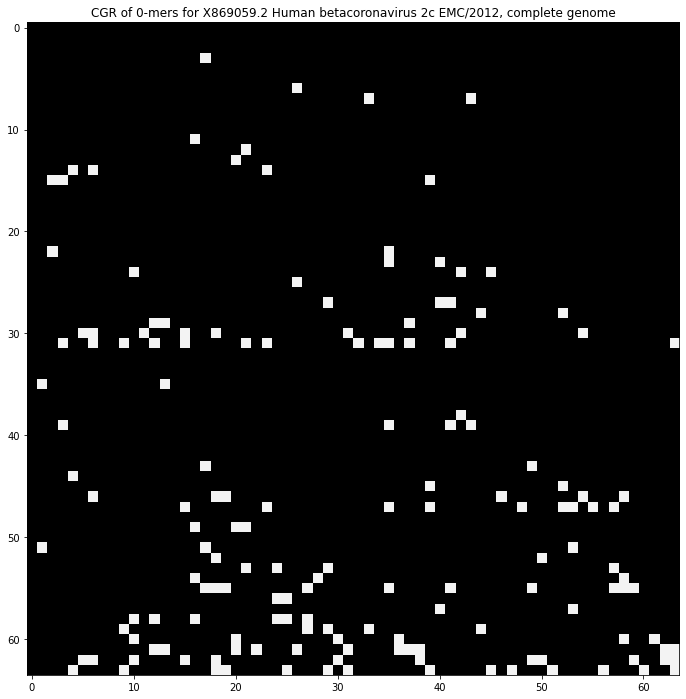

In [35]:
x = B.show()

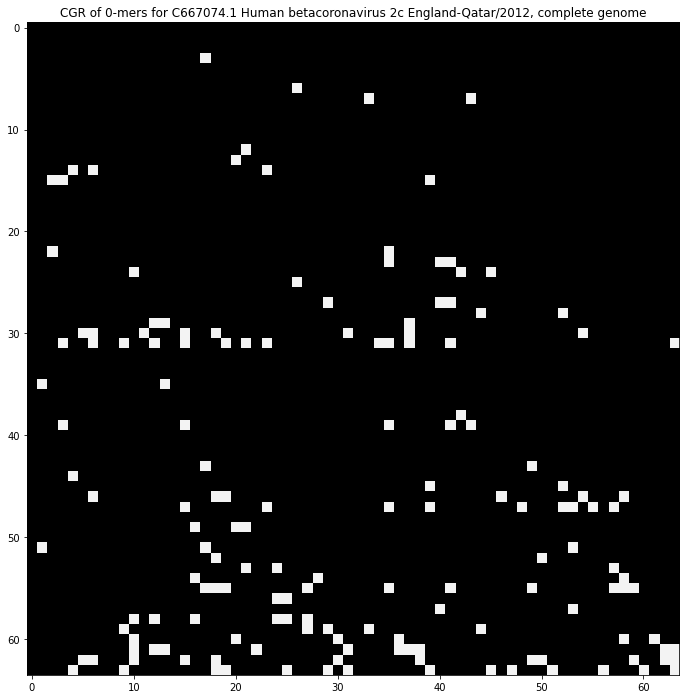

In [36]:
C.show()

In [ ]:
np.array(cg).shape

In [37]:
a = max(cg[0])
b = max(cg[1])
CG = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg[0],cg[1]))
a = max(cg_1[0])
b = max(cg_1[1])
CG_1 = list(map(lambda x,y:((x*(1/a))+(y*(1/b))*10)**0.5, cg_1[0],cg_1[1]))

In [ ]:
CG_1

In [ ]:
CG

In [38]:
from scipy.stats import spearmanr
corr, _ = spearmanr(CG,CG_1)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.986


In [ ]:
f = open("seq_1.fasta")
s1 = f.read()
data_1 = "".join(s1.split("\n")[1:])
f = open("seq_2.fasta")
s1 = f.read()
data_2 = "".join(s1.split("\n")[1:])

In [ ]:
sum=0
for i in range(len(data_2)):
    if data_1[i]==data_2[i]:
        sum+=1
sum/=len(data_1)
print(sum)

In [ ]:
import cv2
from skimage.metrics import structural_similarity as ssim
imageA = cv2.imread("first.PNG")
imageB = cv2.imread("2.PNG")

In [ ]:
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)
(score,_) = ssim(grayA, grayB, full=True)

In [ ]:
score

In [ ]:
pip install SSIM-PIL

In [ ]:
from SSIM_PIL import compare_ssim
from PIL import Image

image1 = Image.open('F.PNG')
image2 = Image.open('S.PNG')
value = compare_ssim(image1, image2)
print(value)

In [ ]:
pip install cgr-view

In [ ]:
pip install jellyfish

In [ ]:
import cgr

In [ ]:
cgr.run_jellyfish("seq_1.fasta", 11, "11mer.jf")
cgr2 = cgr.cgr_matrix("11mer.jf")

In [ ]:
c = cgr.from_fasta("seq_1.fasta", k = 11, as_single = True)

In [ ]:
cgr.load_npy("")

In [ ]:
cgr.draw_cgr(cgr2, h = 0.64, v = 1.0, resize = True)